# **Introduction**




This project is like peeling an onion – I started by cleaning up the data in using Python and its various libraries, which helps to understand things like how age, gender, and money affect suicide rates. Then, I used a fancy tool called SQL to dig even deeper into our data, finding hidden connections and patterns. Finally, I made everything look pretty and easy to understand using Power BI. This helps everyone see what's going on with suicide rates around the world and hopefully find ways to stop them from happening.

In [55]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading and Understanding

In [56]:
suicide_data = pd.read_csv('/content/suicide_data.csv')

In [57]:
suicide_data.shape

(27820, 12)

In [58]:
suicide_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [59]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [60]:
suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [61]:
#Renaming the columns names for convinience

suicide_data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
suicide_data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [62]:
#Renaming the columns names for convinience

suicide_data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count',
                'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
suicide_data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [63]:
suicide_data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [64]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [65]:
suicide_data.age_group.value_counts()


age_group
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

In [66]:
suicide_data.generation.value_counts()

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64

The HDI for the year column contains missing values, while all other columns are complete. As a result, it's being considered for removal from the dataset to ensure data integrity.

In [67]:
#Listing countries

country = suicide_data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

# Data Cleaning and Visualisation


Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicide_count'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicide_rate'}>],
       [<Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

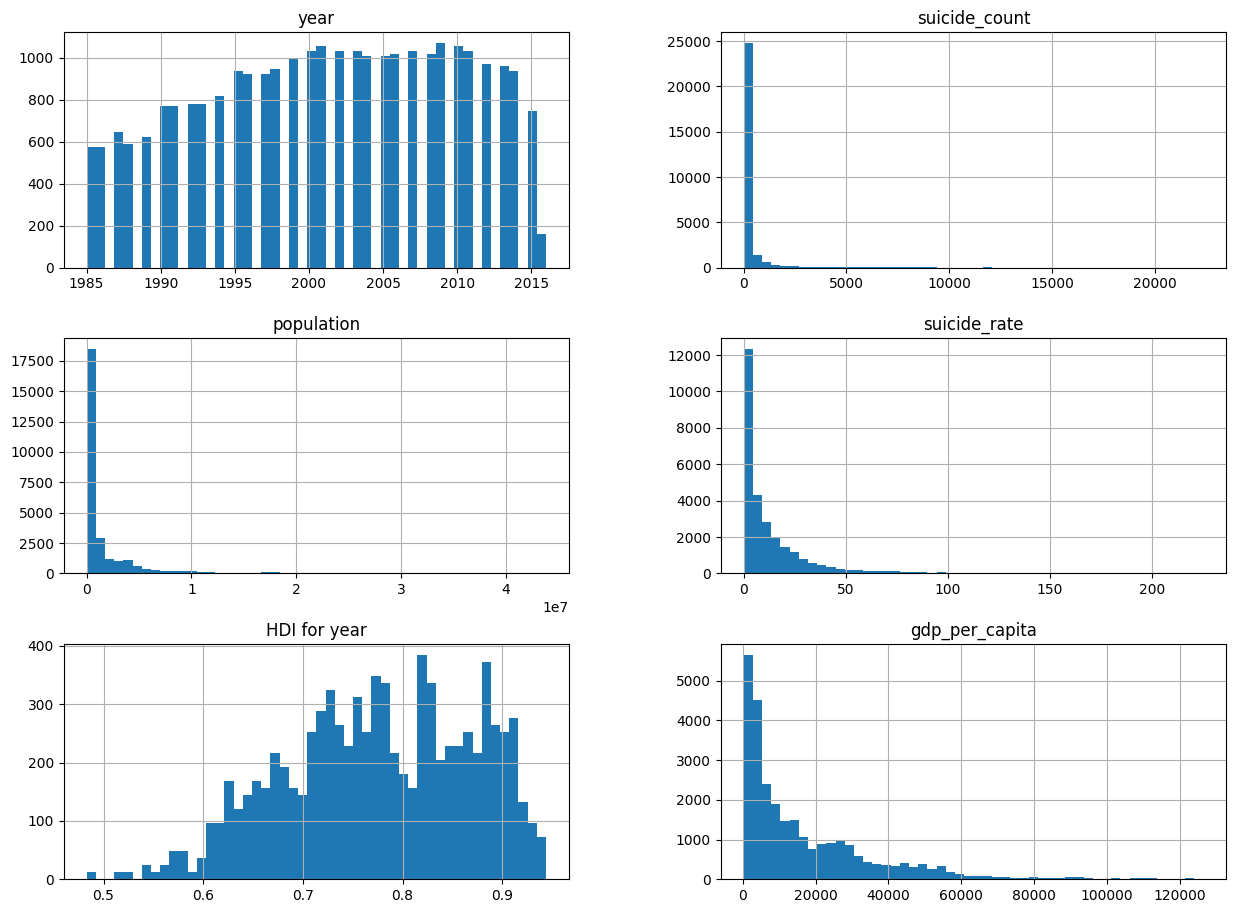

In [68]:
suicide_data.hist(bins = 50,figsize = (15,11))

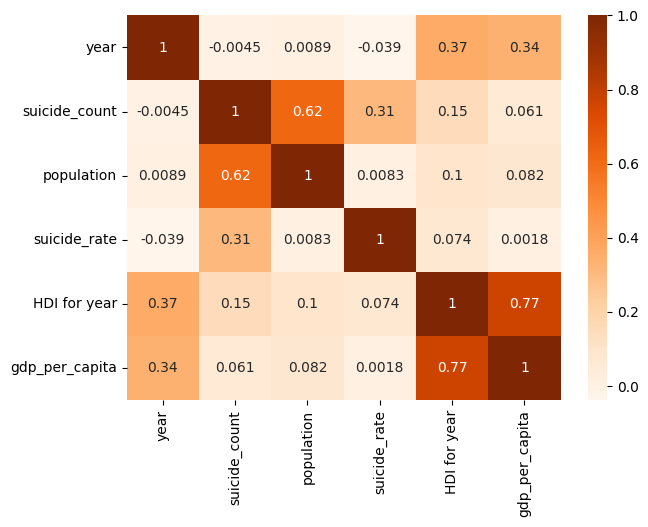

In [69]:
# Selecting only numeric columns
numeric_columns = suicide_data.select_dtypes(include=['float64', 'int64'])

# Generating the correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='Oranges')
plt.show()


<ipython-input-70-5efe5eaed5e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='suicide_count', y='gender', data=suicide_data, palette={'male': 'blue', 'female': 'pink'})


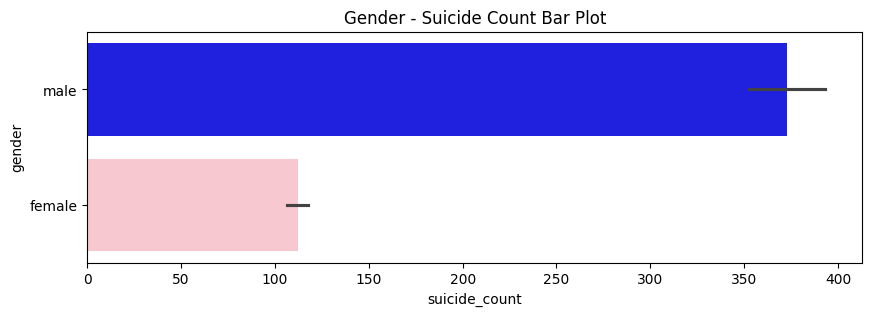

In [70]:
plt.figure(figsize=(10, 3))
sns.barplot(x='suicide_count', y='gender', data=suicide_data, palette={'male': 'blue', 'female': 'pink'})

plt.title('Gender - Suicide Count Bar Plot')
plt.show()


The above plot shows that females are less in counts of suicide while males are more prone to commit suicide


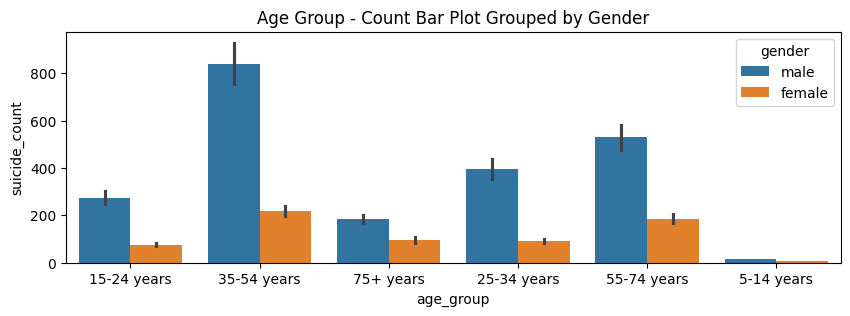

In [71]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,3))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = suicide_data)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

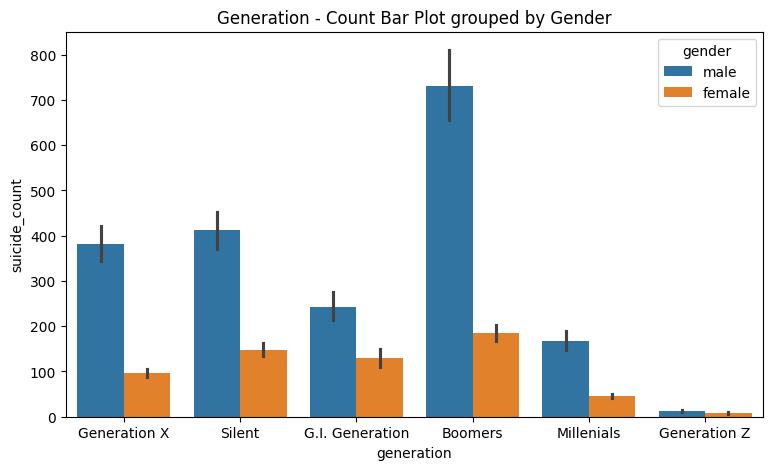

In [72]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = suicide_data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

It is clear that men commit more suicide irrespective of there ages and generations

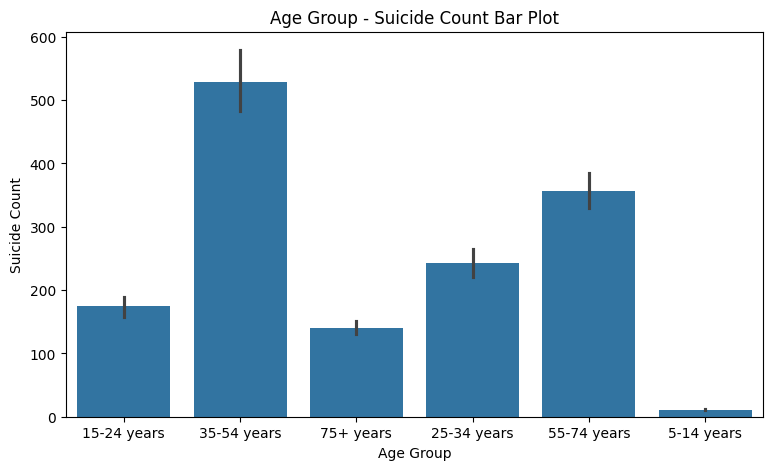

In [73]:
 #Age Group and Suicide count bar plot

plt.figure(figsize=(9,5))
sns.barplot(x=suicide_data['age_group'], y=suicide_data['suicide_count'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

The above plot shows that suicide is more common in 35-54 age group followed by 55-74 age group

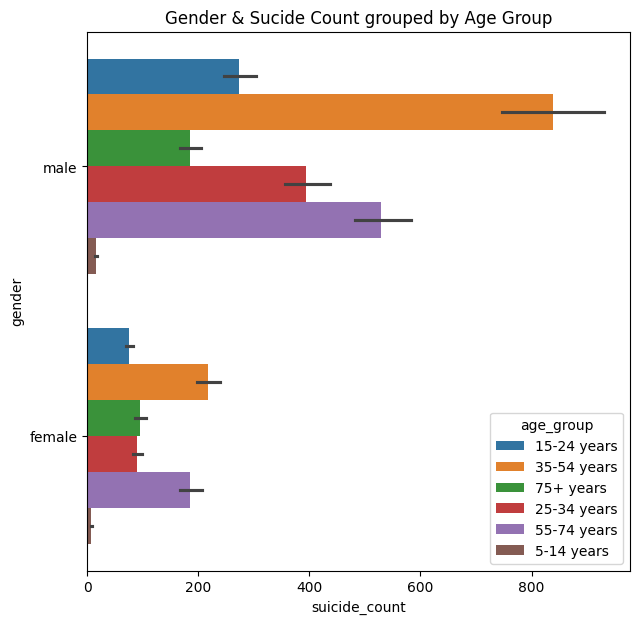

In [74]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="gender", x="suicide_count", hue="age_group", data=suicide_data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()

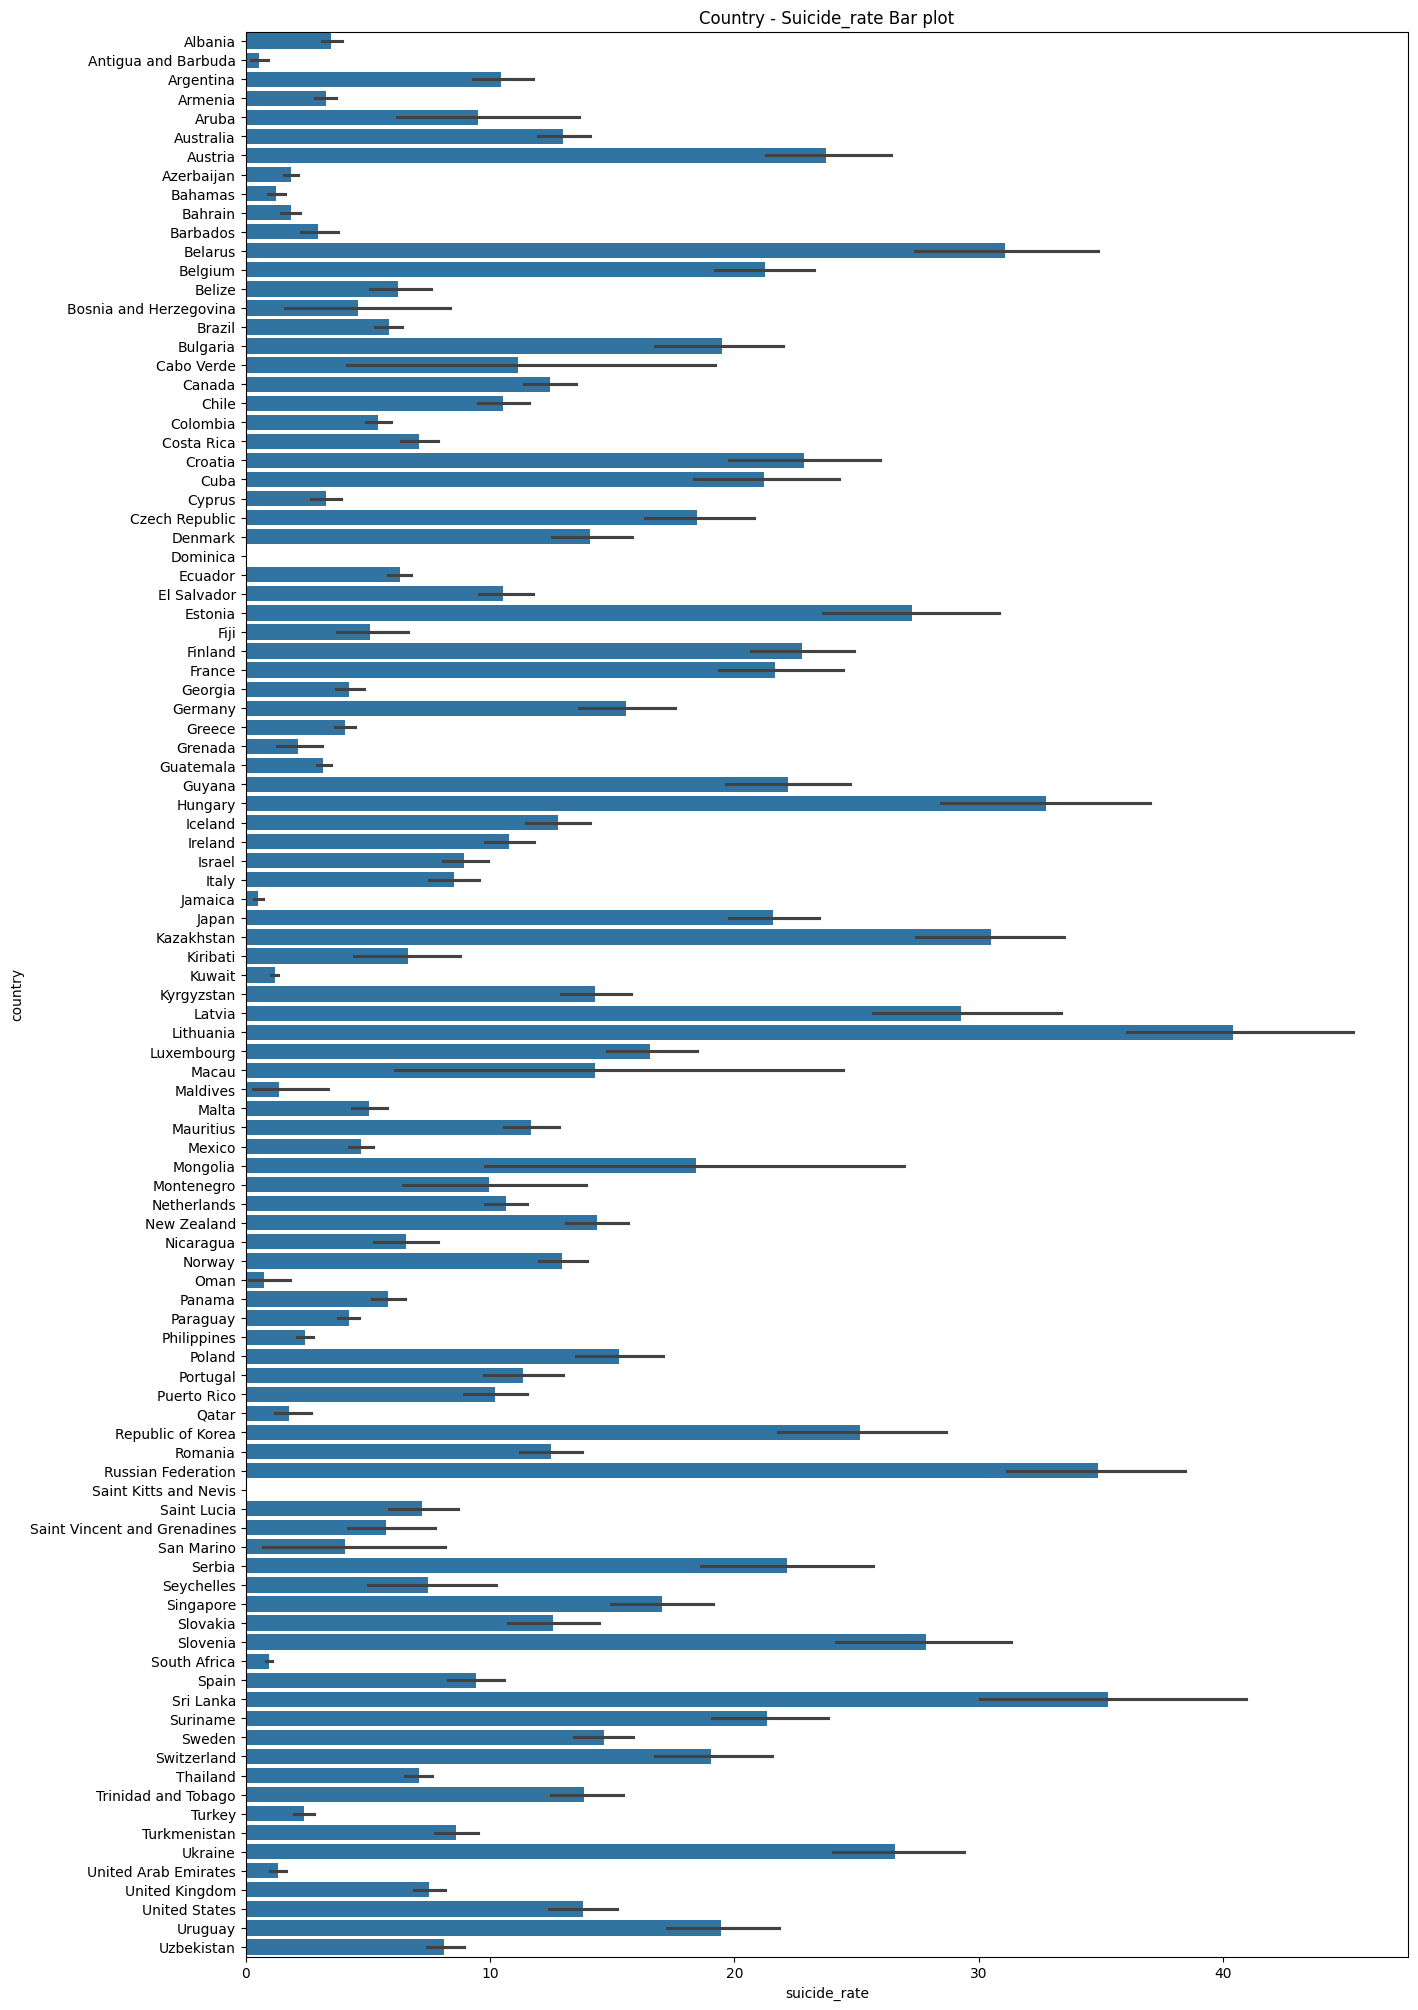

In [75]:

#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = suicide_data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

From the above stats, it is clear that the column, HDI for year has 19456 null values out of 27820 samples which is approximately 70% of the column. This may tamper the model performance so, dropping the HDI for year column from the dataset.

In [76]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [77]:
# Checking if 'HDI for year' is present in the DataFrame
if 'HDI for year' in suicide_data.columns:
    # Dropping the 'HDI for year' column from the DataFrame 'suicide_data'
    # Specifing inplace=True to modify the original DataFrame
    suicide_data.drop(columns=['HDI for year'], inplace=True)
    print("Column 'HDI for year' dropped successfully.")
else:
    print("Column 'HDI for year' not found in DataFrame.")


Column 'HDI for year' dropped successfully.


The column country-year is just a combination of country and year columns. So dropping that column.



In [78]:
# Checking if 'country-year' is present in the DataFrame
if 'country-year' in suicide_data.columns:
    # Dropiing the 'country-year' column from the DataFrame 'suicide_data'
    # Specifing inplace=True to modify the original DataFrame
    suicide_data.drop(columns=['country-year'], inplace=True)
    print("Column 'country-year' dropped successfully.")
else:
    print("Column 'country-year' not found in DataFrame.")


Column 'country-year' dropped successfully.


In [79]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   gdp_for_year    27820 non-null  object 
 8   gdp_per_capita  27820 non-null  int64  
 9   generation      27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


After doing some basic visualisation and reading of the dataset now saving the dataset into file and landing it to Power BI and Creating a report

In [83]:
# Expoting to CSV file This will be used for solving Sql problems
suicide_data.to_csv('cleaned_data.csv')